# Ismail Olumegbon (Midterm project)

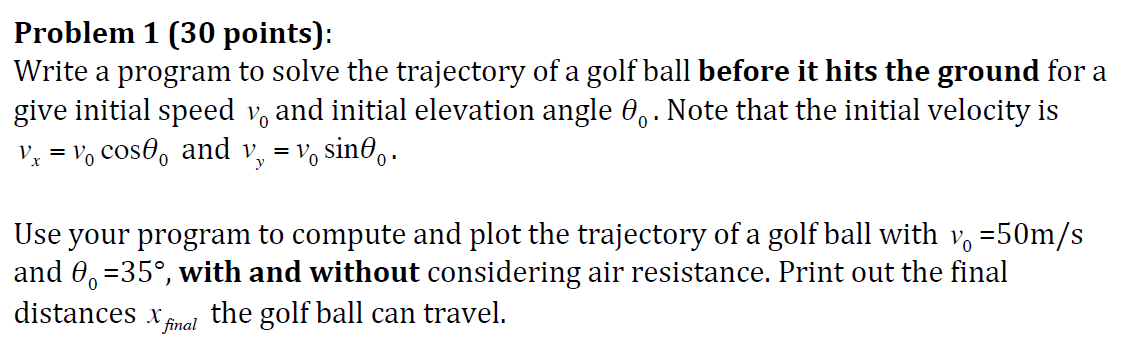

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from sklearn import preprocessing
from scipy.stats import norm
import math

In [2]:
def my_rk2(f,y0,t,*args):
    y=np.empty([t.size,y0.size], dtype=object)
    y[0,:]=y0
    for i in np.arange(1,t.size):
        dt = t[i]-t[i-1]
        y_half = y[i-1,:]+dt/2*f(y[i-1,:],t[i-1],*args)
        dydt = f(y_half,t[i-1]+dt/2,*args)
        y[i,:] = y[i-1,:] + dydt * dt
    return y

def projectile(Y,t,D):
    x,y,vx,vy=Y[0],Y[1],Y[2],Y[3]
    dxdt=vx
    dydt=vy
    ax=-D*np.sqrt(np.power(vx,2) + np.power(vy,2))*vx
    ay=-9.8-D*np.sqrt(np.power(vx,2) + np.power(vy,2))*vy
    tendency=np.array([dxdt,dydt,ax,ay])
    return tendency

In [3]:
#Constants
v0=50.0
theta=35
rho=1.25
r=0.023
c=0.5
m=0.046
g=9.8
D1=0
D2=0.5*rho*c*(np.pi*r**2)/m

x0=0
y0=0
vx0=v0*np.cos(np.deg2rad(theta))
vy0=v0*np.sin(np.deg2rad(theta))
Y0=np.array([x0,y0,vx0,vy0])

tf = 10
t=np.arange(0,tf,0.0001)
y_t1=np.array(my_rk2(projectile,Y0,t,D1))
y_t2=np.array(my_rk2(projectile,Y0,t,D2))

The final distance the golf can travel without air resistance is 239.7166542409501 meters
The final distance the golf can travel with air resistance is 93.06672557752113 meters


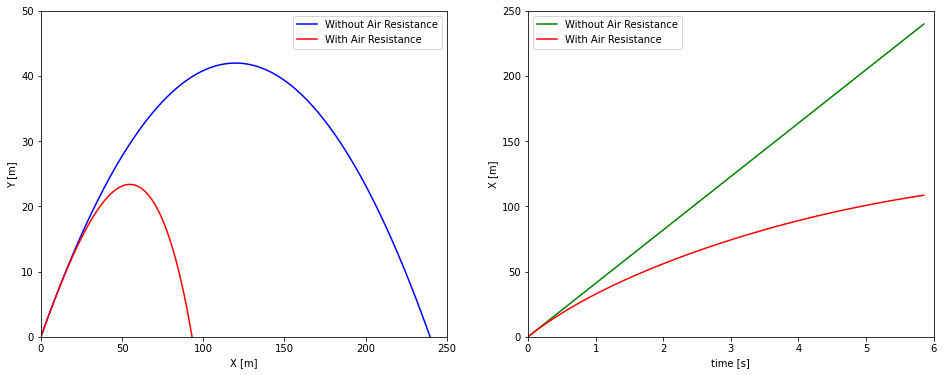

In [4]:
mdx = y_t1[:,1] >=0
ndx = y_t2[:,1] >=0
fig, (ax12, ax13) = plt.subplots(1,2, figsize=(16,6))
ax12.plot(y_t1[:,0][mdx],y_t1[:,1][mdx],'b',label='Without Air Resistance')
ax12.plot(y_t2[:,0][mdx],y_t2[:,1][mdx],c='r',label='With Air Resistance')
ax13.plot(t[mdx],y_t1[:,0][mdx],'g',label='Without Air Resistance')
ax13.plot(t[mdx],y_t2[:,0][mdx],c='r',label='With Air Resistance')
ax12.set_xlabel('X [m]')
ax13.set_xlabel('time [s]')

ax12.set_ylabel('Y [m]')
ax13.set_ylabel('X [m]')
ax12.set_xlim(0,250)
ax13.set_xlim(0,6)
ax12.set_ylim(0,50)
ax13.set_ylim(0,250)
ax12.legend()
ax13.legend()

xfinal_1 = y_t1[mdx,0][-1]
xfinal_2 = y_t2[ndx,0][-1]

print(f'The final distance the golf can travel without air resistance is {xfinal_1} meters')
print(f'The final distance the golf can travel with air resistance is {xfinal_2} meters')

# The final distance the golf can travel without air resistance is 239.7166542409501 meters. The final distance the golf can travel with air resistance is 93.06672557752113 meters

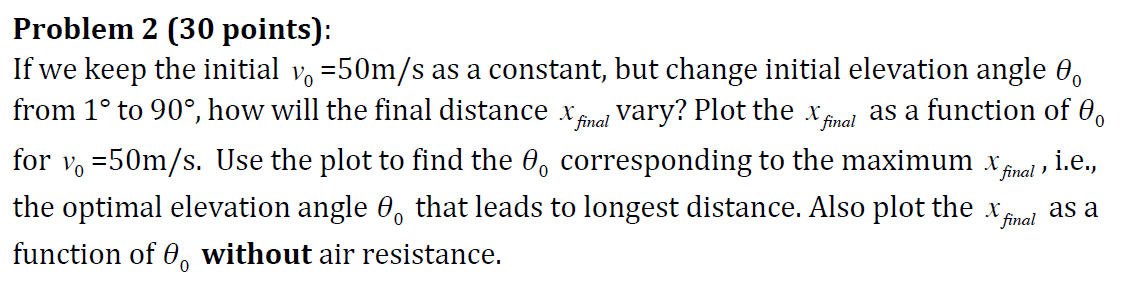

In [5]:
def my_rk2(f,y0,t,*args):
    y=np.empty([t.size,y0.size], dtype=object)
    y[0,:]=y0
    for i in np.arange(1,t.size):
        dt = t[i]-t[i-1]
        y_half = y[i-1,:]+dt/2*f(y[i-1,:],t[i-1],*args)
        dydt = f(y_half,t[i-1]+dt/2,*args)
        y[i,:] = y[i-1,:] + dydt * dt
    return y

def projectile2(Y,t,D):
    x,y,vx,vy=Y[0],Y[1],Y[2],Y[3]
    dxdt=vx
    dydt=vy
    ax=-D*np.sqrt(np.power(vx,2) + np.power(vy,2))*vx
    ay=-9.8-D*np.sqrt(np.power(vx,2) + np.power(vy,2))*vy
    tendency=np.array([dxdt,dydt,ax,ay])
    return tendency

In [6]:
#Constants
v0=50.0
rho=1.25
r=0.023
c=0.5
m=0.046
g=9.8
D2=0.5*rho*c*(np.pi*np.power(r,2))/m
D1=0
tf = 10
t=np.arange(0,tf,0.001)

In [7]:
theta=np.arange(0.0001,91)
y_t4=np.array([my_rk2(projectile2,np.array([0,0,v0*np.cos(np.deg2rad(tt)),v0*np.sin(np.deg2rad(tt))]),t,D1) for tt in theta])
y_t5=np.array([my_rk2(projectile2,np.array([0,0,v0*np.cos(np.deg2rad(tt)),v0*np.sin(np.deg2rad(tt))]),t,D2) for tt in theta])

In [8]:
xfinals = []
xfinals2 = []
for ff in np.arange(0,91):
    tf = 10
    t=np.arange(0,tf,0.001)
    pdx = y_t4[ff,:,1] >=0
    qdx = y_t5[ff,:,1] >=0
    xfinal = y_t4[ff,pdx,0][-1]
    xfinal2 = y_t5[ff,qdx,0][-1]
    xfinals.append(xfinal)
    xfinals2.append(xfinal2)

In [9]:
print(f'The optimal elevation angle that can lead to the longest angle without air resistance is {np.argmax(xfinals)} degree')
print(f'The optimal elevation angle that can lead to the longest angle with air resistance is {np.argmax(xfinals2)} degree')

The optimal elevation angle that can lead to the longest angle without air resistance is 45 degree
The optimal elevation angle that can lead to the longest angle with air resistance is 37 degree


# The optimal elevation angle that can lead to the longest angle without air resistance is 45 degree and 37 degree with air resistance.


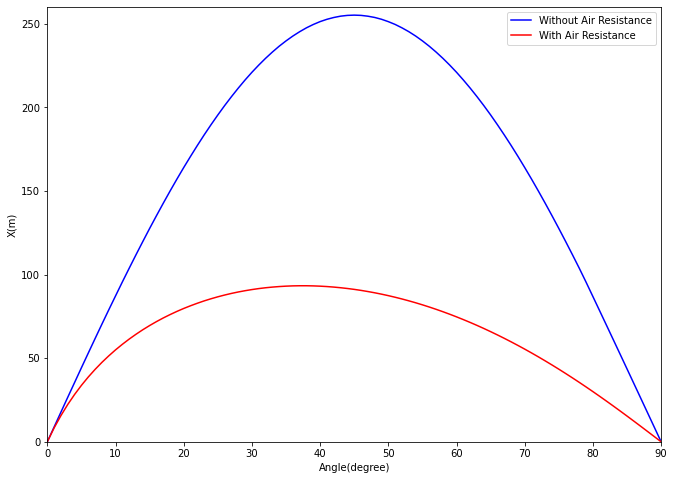

In [10]:
xaxis = np.arange(0,91)
fig,ax2=plt.subplots(figsize=(11,8))
ax2.plot(xaxis, xfinals,'b',label='Without Air Resistance')
ax2.plot(xaxis, xfinals2,'r',label='With Air Resistance')
ax2.set_ylabel('X(m)')
ax2.set_xlabel('Angle(degree)')
ax2.set_xlim(0,90)
ax2.set_ylim(0,260)
ax2.legend()

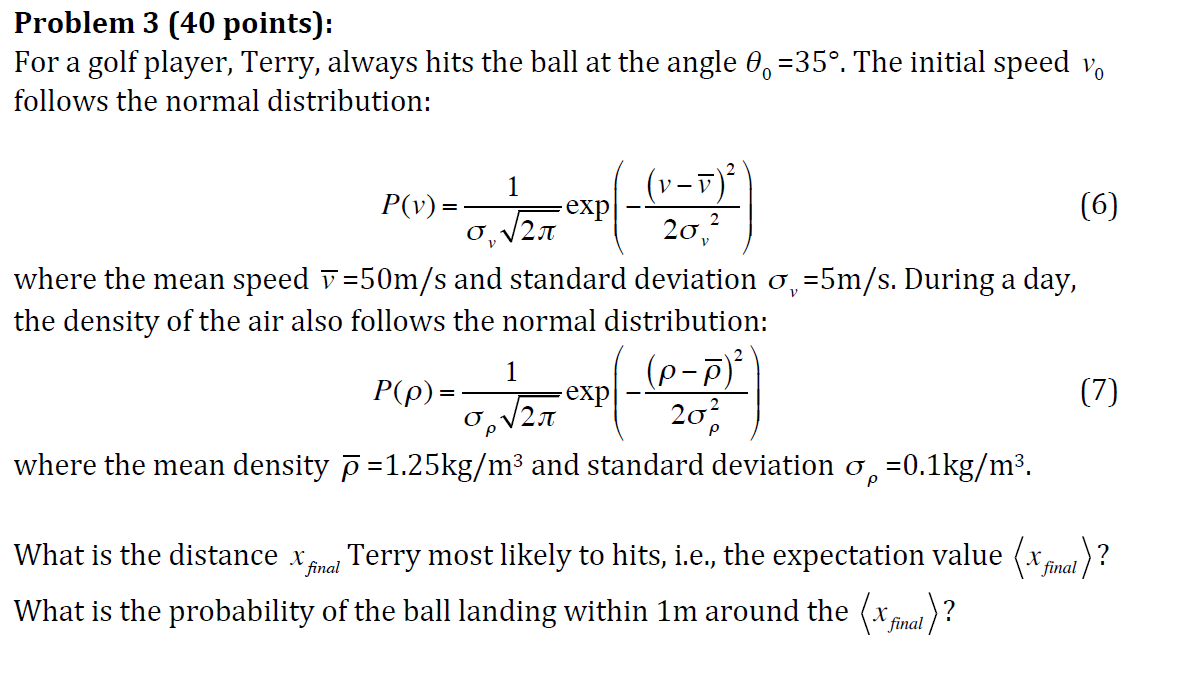

In [11]:
def my_rk3(f,y0,t,*args):
    y=np.empty([t.size,y0.size], dtype=object)
    y[0,:]=y0
    for i in np.arange(1,t.size):
        dt = t[i]-t[i-1]
        y_half = y[i-1,:]+dt/2*f(y[i-1,:],t[i-1],*args)
        dydt = f(y_half,t[i-1]+dt/2,*args)
        y[i,:] = y[i-1,:] + dydt * dt
    return y

def projectile3(Y,t,D):
    x,y,vx,vy=Y[0],Y[1],Y[2],Y[3]
    dxdt=vx
    dydt=vy
    ax=-D*np.sqrt(np.power(vx,2) + np.power(vy,2))*vx
    ay=-9.8-D*np.sqrt(np.power(vx,2) + np.power(vy,2))*vy
    tendency=np.array([dxdt,dydt,ax,ay])
    return tendency


In [21]:
def expectation_value(N):
    xfinal = []
    for plays in np.arange(1,N+1):
        v0=v0=np.random.normal(loc=50, scale= 5, size= 1)[0]
        theta=35
        rho=np.random.normal(loc=1.25, scale= 0.1, size= 1)[0]
        r=0.023
        c=0.5
        m=0.046
        g=9.8
        D3=0.5*rho*c*(np.pi*r**2)/m

        x0=0
        y0=0
        vx0=v0*np.cos(np.deg2rad(theta))
        vy0=v0*np.sin(np.deg2rad(theta))
        Y0=np.array([x0,y0,vx0,vy0])

        tf = 10
        t=np.arange(0,tf,0.0001,dtype=object)
        y_t6=np.array(my_rk3(projectile3,Y0,t,D3),dtype=object)
        ndx = y_t6[:,1] >=0
        xfinal_1 = y_t6[ndx,0][-1]
        xfinal.append(xfinal_1)
    return xfinal

In [22]:
N = 1000
expected_xfinals = expectation_value(N)
print(np.mean(expected_xfinals), np.max(expected_xfinals), np.min(expected_xfinals))

92.52959396762293 120.4409501282664 64.64828738067808


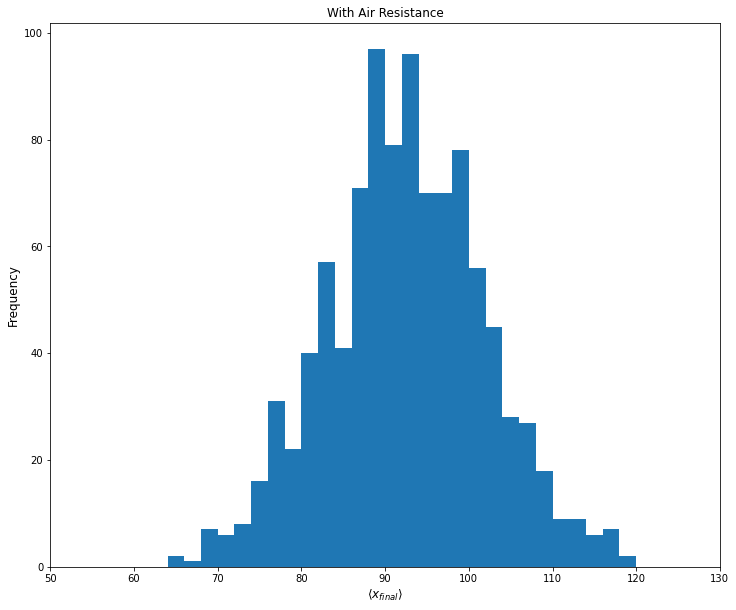

In [23]:
plt.figure(figsize = (12,10))
plt.hist(expected_xfinals, bins = np.arange(0,np.max(expected_xfinals),2))
plt.ylabel('Frequency',fontsize='large')
plt.xlabel(r'$\langle x_{final}\rangle$',fontsize='large')
plt.title('With Air Resistance',fontsize='large')
plt.xlim(50,130)
plt.show()

In [24]:
expected_prob = []
for i in np.arange(len(expected_xfinals)):
    x = expected_xfinals[i]
    ave = np.mean(expected_xfinals)
    std = np.std(expected_xfinals)
    P1= (1/std*np.sqrt(2*np.pi))*np.exp(-(x-ave)**2/(2*std**2))
    expected_prob.append(P1)

In [25]:
def expected_value(values, weights):
    values = np.asarray(values)
    weights = np.asarray(weights)
    return (values * weights).sum() / weights.sum()

In [26]:
values = expected_xfinals
weights = expected_prob
xfinal_value = expected_value(values, weights)
print(f'The expectation value of the xfinals after {N} plays = {xfinal_value} meters')

The expectation value of the xfinals after 1000 plays = 92.51645359327706 meters


# The expectation value of the xfinals after 1000 plays = 92.51645359327706 meters

In [27]:
total_N = len(expected_xfinals)
count_onem = 0
for hit in np.arange(total_N):
    xfinal_onem = abs(expected_xfinals[hit] - xfinal_value)
    if xfinal_onem <= 1.0:
        count_onem += 1
prob_onem = count_onem/total_N
print(f'The probability of the ball landing within 1 meters around the xfinals after {N} plays = {prob_onem} ')

The probability of the ball landing within 1 meters around the xfinals after 1000 plays = 0.089 


# The probability of the ball landing within 1 meters around the xfinals after 1000 plays = 0.089 